In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATASET_LOCATION = './data/Language Detection.csv'
df = pd.read_csv(DATASET_LOCATION)

In [3]:
print(df.shape)
print(df.columns)
print(df["Language"].unique())

(10337, 2)
Index(['Text', 'Language'], dtype='object')
['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']


In [4]:
df_iteng = df[(df['Language'] == 'Italian') | (df['Language'] == 'English')].copy()

In [5]:
print(df_iteng.shape)
df_iteng.info()
df_iteng.isnull().sum()

(2083, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 2083 entries, 0 to 7811
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2083 non-null   object
 1   Language  2083 non-null   object
dtypes: object(2)
memory usage: 48.8+ KB


Text        0
Language    0
dtype: int64

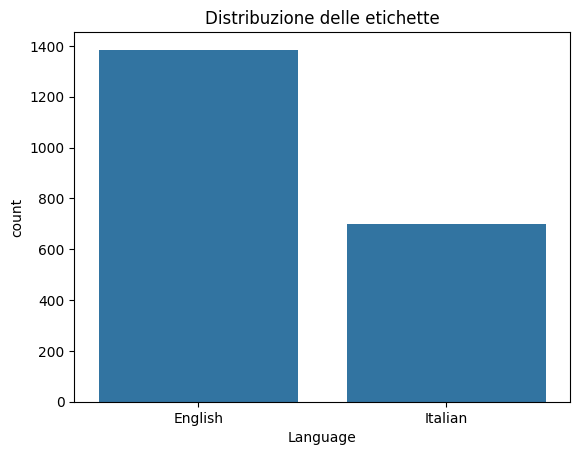

Language
English    0.664906
Italian    0.335094
Name: proportion, dtype: float64


In [6]:
sns.countplot(x='Language', data=df_iteng)
plt.title('Distribuzione delle etichette')
plt.show()

print(df_iteng['Language'].value_counts(normalize=True))


In [7]:
df_iteng['text_length'] = df_iteng['Text'].apply(len)
df_iteng['word_count'] = df_iteng['Text'].apply(lambda x: len(str(x).split()))

df_iteng[['text_length', 'word_count']].describe()

,text_length,word_count
count,2083.000000,2083.000000
mean,138.662506,22.010082
std,95.994266,15.032894
min,4.000000,1.000000
25%,75.000000,12.000000
50%,124.000000,20.000000
75%,185.000000,29.000000
max,1007.000000,144.000000


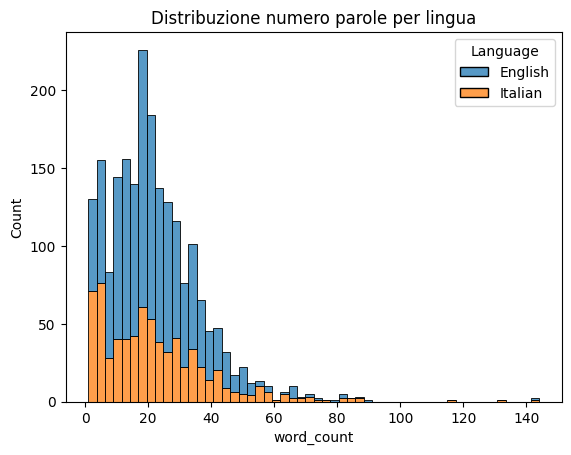

In [8]:
#Importante per verificare  
 
sns.histplot(data=df_iteng, x='word_count', bins='auto', kde=False, hue='Language', multiple='stack')
plt.title("Distribuzione numero parole per lingua")
plt.show()

In [12]:
df_iteng[df_iteng['word_count'] == 2].style

,Text,Language,text_length,word_count
1074,wasn't able.,English,12,2
1125,it's fine.,English,10,2
1133,i'm sorry.,English,10,2
1141,i'm sorry.,English,10,2
1149,fingers crossed.,English,16,2
1170,come on.,English,8,2
1195,i know.,English,7,2
1196,i'm sorry.,English,10,2
1207,take care.,English,10,2
1219,what's up?,English,10,2
